In [3]:
#!apt-get install libproj-dev proj-data proj-bin
#!apt-get install libgeos-dev
%pip install cython
%pip install cartopy

#!apt-get -qq install python-cartopy python3-cartopy
%pip uninstall -y shapely    # cartopy and shapely aren't friends (early 2020)
%pip install shapely --no-binary shapely

Note: you may need to restart the kernel to use updated packages.
  Using cached Cartopy-0.20.1.tar.gz (10.8 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  ERROR: Command errored out with exit status 1:
   command: /home/lucas/anaconda3/bin/python /home/lucas/anaconda3/lib/python3.8/site-packages/pip/_vendor/pep517/_in_process.py get_requires_for_build_wheel /tmp/tmpnlcunk90
       cwd: /tmp/pip-install-gzyybcgv/cartopy_3f6793d9998e4d22be59e0ddb7eb0ffb
  Complete output (3 lines):
  setup.py:117: UserWarning: Unable to determine GEOS version. Ensure you have 3.7.2 or later installed, or installation may fail.
    warnings.warn(
  Proj 8.0.0 must be installed.
  ----------------------------------------
  Using cached Cartopy-0.20.0.tar.gz (10.8 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  ERROR: Command errored out with exit status 1:
   command: /home/lucas/anaconda3/bin/python /home/lucas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import plotly.express as px
import kaggle
import geopandas as gpd

In [17]:


col_names = ['animal_name'
,'hair'
,'feathers'
,'eggs'
,'milk'
,'airborne'
,'aquatic'
,'predator'
,'toothed'
,'backbone'
,'breathes'
,'venomous'
,'fins'
,'legs'
,'tail'
,'domestic'
,'catsize'
,'type']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data', names=col_names)

In [22]:
# para simplificar  e visualizar, pegando apenas as primeiras duas características...
#X = df[:, 1:17]
#y = iris.target
X = df.iloc[:, 1:17]
y = df.type

In [23]:
n_components = 2
print( "Extraindo %d componentes das %d amostras" % (n_components, len(y)) )

pca = PCA(n_components=n_components, whiten=True, svd_solver='randomized')
pca = pca.fit(X)

X = pca.transform(X)
print('Mantida %5.2f%% da informação do conjunto inicial de dados'%(sum(pca.explained_variance_ratio_)*100))


Extraindo 2 componentes das 101 amostras
Mantida 77.06% da informação do conjunto inicial de dados


(-2.3604272047208337, 2.5395727952791702)

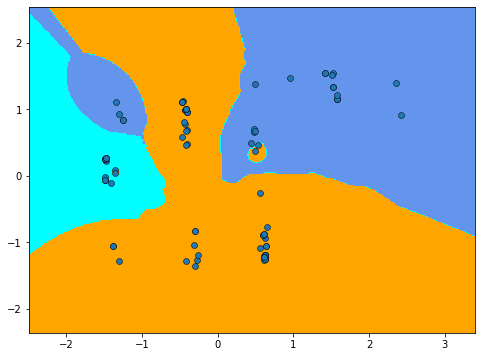

In [28]:
n_neighbors = 10
h = .02  # step size in the mesh
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
sns.scatterplot(x=X[:, 0], y=X[:, 1],
                palette=cmap_bold, alpha=1.0, edgecolor="black")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#plt.title("3-Class classification (k = %i, weights = '%s')"
#            % (n_neighbors, weights))
#plt.xlabel(iris.feature_names[0])
#plt.ylabel(iris.feature_names[1])

In [2]:

df = px.data.gapminder().query("year == 2007")
fig = px.scatter_geo(df, locations="iso_alpha",
                     size="pop", # size of markers, "pop" is one of the columns of gapminder
                     )
fig.show()

In [29]:
#kaggle.api.authenticate()
#kaggle.api.dataset_download_files('NUFORC/ufo-sightings', path='../datasets', unzip=True)

ufo_df = pd.read_csv('../datasets/complete.csv', warn_bad_lines=False,error_bad_lines=False,sep=',',low_memory=False)

ufo_df["shape"].fillna('none',inplace=True)

ufo_df = ufo_df.loc[(ufo_df["shape"] == "circle")]

fig = px.scatter_geo(ufo_df,
                    lat=ufo_df.latitude,
                    lon=ufo_df.longitude,
                    color="shape", # which column to use to set the color of 
                    )
fig.show()


In [30]:



kaggle.api.authenticate()
kaggle.api.dataset_download_files('liananapalkova/nuclear-power-plants', path='../datasets', unzip=True)

nuclear_df = pd.read_csv('../datasets/energy-pop-exposure-nuclear-plants-locations_plants.csv',error_bad_lines=False,sep=',')

#ufo_df["shape"].fillna('none',inplace=True)

#ufo_df = ufo_df.head(10000)

fig = px.scatter_geo(ufo_df,
                    lat=nuclear_df.Latitude,
                    lon=nuclear_df.Longitude,
                    #color="shape", # which column to use to set the color of 
                    )
fig.show()


In [ ]:
# importing the requests module
import requests
print('Downloading started')
url = 'https://golang.org/dl/go1.17.3.windows-amd64.zip'

# Downloading the file by sending the request to the URL
req = requests.get(url)
 
# Split URL to get the file name
filename = url.split('/')[-1]
 
# Writing the file to the local file system
with open(filename,'wb') as output_file:
    output_file.write(req.content)
print('Downloading Completed')


# import required modules
import zipfile
import pandas as pd
 
# open zipped dataset
with zipfile.ZipFile("test.zip") as z:
   # open the csv file in the dataset
   with z.open("test.csv") as f:
       
      # read the dataset
      train = pd.read_csv(f)
       
      # display dataset
      print(train.head())